In [1]:
import pandas as pd
import seaborn as sns

In [2]:
housing = pd.read_csv("train.csv")

In [3]:
housing.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


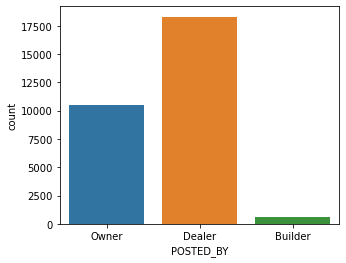

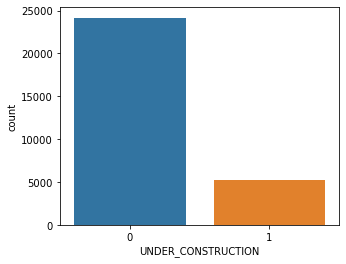

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5,4))
sns.countplot(data = housing, x = 'POSTED_BY')
plt.show()
plt.figure(figsize = (5,4))
sns.countplot(data = housing, x = 'UNDER_CONSTRUCTION')
plt.show()


In [6]:
import numpy as np
for column in housing:
    uniq_val = np.unique(housing[column])
    np_val = len(uniq_val)
    if np_val < 10:
        print("The number of values for feature {} is: {} -- {}".format(column, np_val, uniq_val))
    else:
        print("The number of values for feature {} is: {}".format(column, np_val)) 

The number of values for feature POSTED_BY is: 3 -- ['Builder' 'Dealer' 'Owner']
The number of values for feature UNDER_CONSTRUCTION is: 2 -- [0 1]
The number of values for feature RERA is: 2 -- [0 1]
The number of values for feature BHK_NO. is: 16
The number of values for feature BHK_OR_RK is: 2 -- ['BHK' 'RK']
The number of values for feature SQUARE_FT is: 19561
The number of values for feature READY_TO_MOVE is: 2 -- [0 1]
The number of values for feature RESALE is: 2 -- [0 1]
The number of values for feature ADDRESS is: 6899
The number of values for feature LONGITUDE is: 4087
The number of values for feature LATITUDE is: 4078
The number of values for feature TARGET(PRICE_IN_LACS) is: 1172


In [7]:
housing['CITY'] = housing['ADDRESS'].str.split(",").str[-1]
housing = housing.drop('ADDRESS', axis = 1)

array([[<AxesSubplot:title={'center':'UNDER_CONSTRUCTION'}>,
        <AxesSubplot:title={'center':'RERA'}>,
        <AxesSubplot:title={'center':'BHK_NO.'}>],
       [<AxesSubplot:title={'center':'SQUARE_FT'}>,
        <AxesSubplot:title={'center':'READY_TO_MOVE'}>,
        <AxesSubplot:title={'center':'RESALE'}>],
       [<AxesSubplot:title={'center':'LONGITUDE'}>,
        <AxesSubplot:title={'center':'LATITUDE'}>,
        <AxesSubplot:title={'center':'TARGET(PRICE_IN_LACS)'}>]],
      dtype=object)

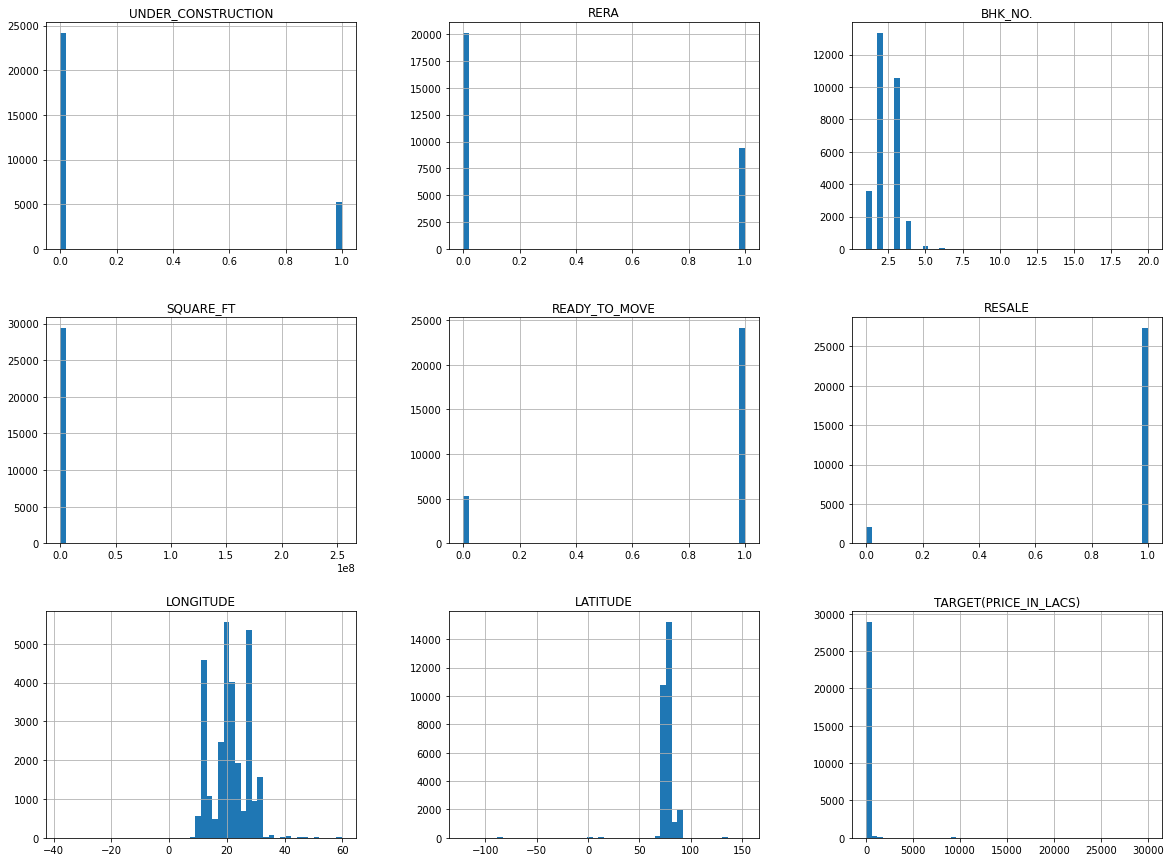

In [8]:
housing.hist(bins=50, figsize=(20,15))

In [9]:
housing['LONGITUDE'] = np.log(housing['LONGITUDE'] )
housing['LATITUDE'] = np.log(housing['LATITUDE'] )

D:\Software\Anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
housing.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2,BHK,1300.236407,1,1,2.562632,4.351541,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,2.507527,4.339179,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,2.547728,4.351982,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,3.354885,4.348269,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,3.117605,4.482832,60.5,Kolkata


In [11]:
def map_city(city):
    if city in ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune', 'Maharashtra']:
        return 'Tier1'
    elif city in ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly', 
                  'Belgaum', 'Bhavnagar', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City', 
                  'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad', 'Bhilai', 'Durgapur', 'Dindigul', 'Erode', 
                  'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 'Gurgaon', 'Guwahati', 
                  'Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 
                  'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode', 
                  'Kurnool', 'Ludhiana', 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad', 
                  'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore', 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj', 
                  'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Ratlam', 'Salem', 'Sangli', 'Shimla', 'Siliguri', 
                  'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli', 
                  'Tiruvannamalai', 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam', 
                  'Vellore', 'Warangal']:
        return 'Tier2'
    else:
        return 'Tier3'
    
housing['CITY_TIER'] = housing['CITY'].apply(map_city)

In [12]:
housing.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,CITY_TIER
0,Owner,0,0,2,BHK,1300.236407,1,1,2.562632,4.351541,55.0,Bangalore,Tier1
1,Dealer,0,0,2,BHK,1275.000000,1,1,2.507527,4.339179,51.0,Mysore,Tier2
2,Owner,0,0,2,BHK,933.159722,1,1,2.547728,4.351982,43.0,Bangalore,Tier1
3,Owner,0,1,2,BHK,929.921143,1,1,3.354885,4.348269,62.5,Ghaziabad,Tier2
4,Dealer,1,0,2,BHK,999.009247,0,1,3.117605,4.482832,60.5,Kolkata,Tier1


In [13]:
housing = housing.drop('CITY', axis = 1)

In [14]:
features = ['POSTED_BY', 'BHK_OR_RK', 'CITY_TIER']
new_df = pd.get_dummies(housing, columns = features)

In [15]:
new_df.isna().sum()

UNDER_CONSTRUCTION        0
RERA                      0
BHK_NO.                   0
SQUARE_FT                 0
READY_TO_MOVE             0
RESALE                    0
LONGITUDE                12
LATITUDE                 83
TARGET(PRICE_IN_LACS)     0
POSTED_BY_Builder         0
POSTED_BY_Dealer          0
POSTED_BY_Owner           0
BHK_OR_RK_BHK             0
BHK_OR_RK_RK              0
CITY_TIER_Tier1           0
CITY_TIER_Tier2           0
CITY_TIER_Tier3           0
dtype: int64

In [16]:
new_df.dropna(subset=['LATITUDE'], how='all', inplace=True)
new_df.dropna(subset=['LONGITUDE'], how='all', inplace=True)

In [17]:
from sklearn.model_selection import train_test_split
X = new_df.drop('TARGET(PRICE_IN_LACS)', axis = 1)
y = new_df['TARGET(PRICE_IN_LACS)']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [18]:
X

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK,CITY_TIER_Tier1,CITY_TIER_Tier2,CITY_TIER_Tier3
0,0,0,2,1300.236407,1,1,2.562632,4.351541,0,0,1,1,0,1,0,0
1,0,0,2,1275.000000,1,1,2.507527,4.339179,0,1,0,1,0,0,1,0
2,0,0,2,933.159722,1,1,2.547728,4.351982,0,0,1,1,0,1,0,0
3,0,1,2,929.921143,1,1,3.354885,4.348269,0,0,1,1,0,0,1,0
4,1,0,2,999.009247,0,1,3.117605,4.482832,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29445,0,0,2,1062.134891,1,1,2.764221,4.310799,0,0,1,1,0,0,1,0
29446,0,0,3,2500.000000,1,1,3.301032,4.357264,0,0,1,1,0,0,1,0
29448,0,0,2,1022.641509,1,1,3.293196,4.328468,0,1,0,1,0,0,1,0
29449,0,0,2,927.079009,1,1,2.557239,4.384871,0,0,1,1,0,1,0,0


In [19]:
y_train

29378    120.0
14660    470.0
16097     75.0
12025     60.0
5055      51.0
         ...  
12157     50.0
24495    100.0
14189     38.9
23385     85.2
5657      65.0
Name: TARGET(PRICE_IN_LACS), Length: 20549, dtype: float64

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
# , confusion_matrix, accuracy_score, log_loss, classification_report, mean_squared_error, mean_absolute_error
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

In [21]:
print(lr.score(X_train, y_train))
print(lr.score(X_valid, y_valid))

0.2566925498349062
0.17980063399486024


In [22]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

preds = rf_model.predict(X_valid)

print('Random Forest: ', r2_score(y_valid, preds))

Random Forest:  0.7949180696615127


In [23]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

preds = dt.predict(X_train)

r2_score(y_train, preds)

0.9999711666333725

In [24]:
from joblib import dump,load
dump(dt, 'desiciontree.joblib')

['desiciontree.joblib']

In [25]:
# from joblib import dump,load
# import numpy as np
model = load('desiciontree.joblib')
features = np.array([[0,0,2,1275.000000,1,1,2.507527,4.339179,0,1,0,1,0,0,1,0]])
model.predict(features)

array([51.])

In [26]:
import pickle
file = open('SGP.pkl','wb')
pickle.dump(dt , file)